## Tópicos Especiais em Inteligência Artificial

## Atividade: Classificação de mãos de poquer com Deep Neural Network (DNN)

### Aluno: Víctor Hordones Ramos

### Professor: Ciniro Aparecido Leite Nametala

Neste trabalho, utilizaremos o Poker Hand Data Set disponível no repositório de datasets da UCI. Este é um conjunto de dados multivariado que contém instâncias de mãos de baralho padrão, utilizado para classificar a categoria da mão de um jogador: 0 (Nothin in hand) até 9 (Royal flush). O dataset completo contém 1.025.010 amostras, mas para esta atividade utilizaremos um subconjunto de 25.010 amostras.  

O modelo recebe 10 atributos de entrada (características das 5 cartas) e 1 atributo de saída (classe da mão):

1. S1: Naipe da carta #1 (1-4: Copas, Espadas, Ouros, Paus)

2. C1: Valor da carta #1 (1-13: Ás, 2, 3, ..., Valete, Dama, Rei)

3. S2: Naipe da carta #2

4. C2: Valor da carta #2

5. S3: Naipe da carta #3

6. C3: Valor da carta #3

7. S4: Naipe da carta #4

8. C4: Valor da carta #4

9. S5: Naipe da carta #5

10. C5: Valor da carta #5

[SAÍDA] Classe: Classificação da mão (0 a 9, onde 0 é "Nada" e 9 é "Royal Flush")

### 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

2026-01-08 19:38:57.034599: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-08 19:38:57.064465: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-08 19:38:57.064488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-08 19:38:57.065107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-08 19:38:57.069481: I tensorflow/core/platform/cpu_feature_guar

### 2. Dataset

In [2]:
col_names = ['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5', 'class']
data_train = pd.read_csv('dataset_poquer/data_poker_treino.data', header=None, names=col_names)
data_test = pd.read_csv('dataset_poquer/data_poker_teste.data', header=None, names=col_names)
data_full = pd.concat([data_train, data_test], ignore_index=True)

In [3]:
naipes = {1: [1, 0], 2: [1, 1], 3: [0, 0], 4: [0, 1]}
valores = {i: [int(b) for b in format(i-1, '04b')] for i in range(1, 14)}

def mapear_atributos_otimizado(data):
    lista_de_atributos = []
    for i in range(1, 6):
        s_col = data[f's{i}'].map(naipes).tolist()
        c_col = data[f'c{i}'].map(valores).tolist()
        atributos_carta = [s + c for s, c in zip(s_col, c_col)]
        lista_de_atributos.append(atributos_carta)

    X_final = [sum(cards, []) for cards in zip(*lista_de_atributos)]
    return np.array(X_final, dtype=np.int8)

X = mapear_atributos_otimizado(data_full)
y = to_categorical(data_full['class'], num_classes=10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

### 3. Rede Neural

In [5]:
inputs = Input(shape=(30,))
x = Dense(128, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

2026-01-08 19:39:14.056715: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-01-08 19:39:14.101112: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-01-08 19:39:14.101464: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### 3.1. Inspeção do modelo

In [6]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

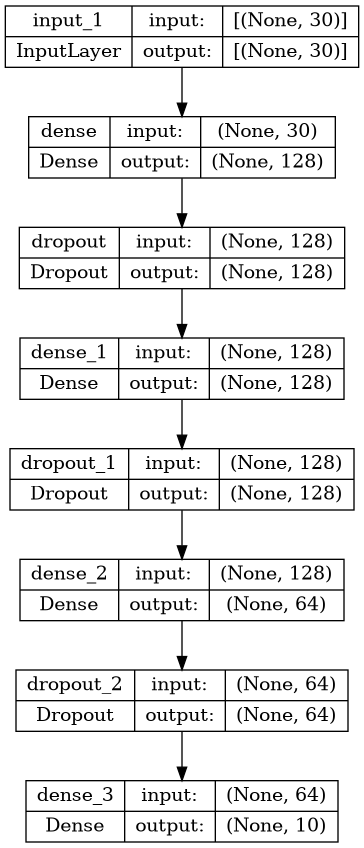

In [7]:
#plotar o modelo
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="TB") #rankdir - orientacao (vertical, horizontal)

In [8]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=2048,
    callbacks=[es],
    verbose=1
)

Epoch 1/200


2026-01-08 19:39:27.960170: I external/local_xla/xla/service/service.cc:168] XLA service 0x721cc11122f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-08 19:39:27.960193: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2026-01-08 19:39:27.964379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-08 19:39:27.977044: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1767911968.029913   16542 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


452/452 [==============================] - 3s 3ms/step - loss: 0.9980 - accuracy: 0.5202 - val_loss: 0.8971 - val_accuracy: 0.5966
Epoch 2/200
452/452 [==============================] - 1s 3ms/step - loss: 0.8910 - accuracy: 0.5968 - val_loss: 0.8464 - val_accuracy: 0.6194
Epoch 3/200
452/452 [==============================] - 1s 2ms/step - loss: 0.8419 - accuracy: 0.6255 - val_loss: 0.7633 - val_accuracy: 0.6705
Epoch 4/200
452/452 [==============================] - 1s 2ms/step - loss: 0.7524 - accuracy: 0.6773 - val_loss: 0.6412 - val_accuracy: 0.7327
Epoch 5/200
452/452 [==============================] - 1s 2ms/step - loss: 0.6495 - accuracy: 0.7325 - val_loss: 0.5034 - val_accuracy: 0.7965
Epoch 6/200
452/452 [==============================] - 1s 2ms/step - loss: 0.5579 - accuracy: 0.7781 - val_loss: 0.3990 - val_accuracy: 0.8466
Epoch 7/200
452/452 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.8076 - val_loss: 0.3199 - val_accuracy: 0.8824
Epoch 8/200

### 4. Resultados

#### 4.1. Curva de Convergência do erro

Acurácia no dataset de teste: 99.88%


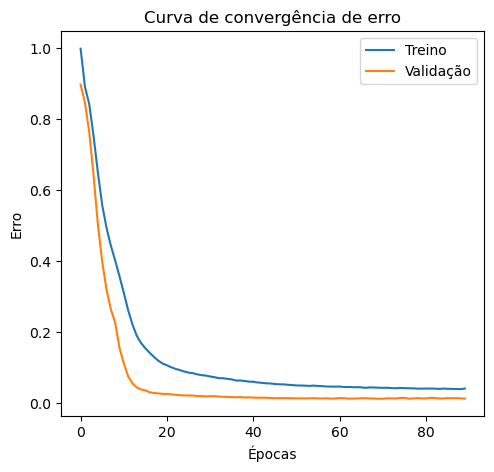

In [12]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no dataset de teste: {acc*100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de convergência de erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()

#### 4.2. Matriz de Confusão

1602/1602 [==============================] - 1s 755us/step


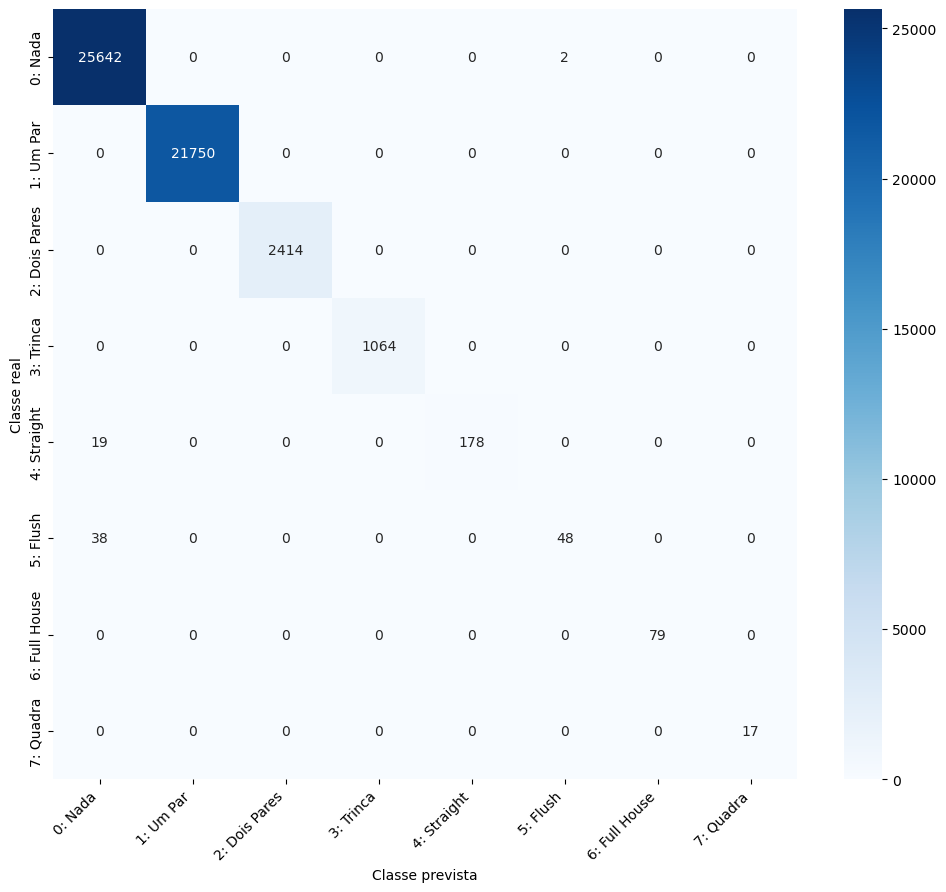

In [11]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

class_names = [
    "0: Nada", "1: Um Par", "2: Dois Pares", "3: Trinca",
    "4: Straight", "5: Flush", "6: Full House", "7: Quadra"
]

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Classe real')
plt.xlabel('Classe prevista')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5. Perguntas e Respostas

##### Calcule a taxa de acerto no conjunto de teste. O que ela mostra? O modelo esta conseguindo realizar a classificação corretamente?

* Taxa de acerto: 99,88%

Essa taxa de acerto mostra que o modelo está conseguindo classificar quase todas as mãos de poquer corretamente, errando somente 0,12%.  

Pela matriz de confusão:

* Nada (0): conseguindo classificar quase todas as mãos de poquer corretamente (25642 mãos), errando em apenas 2 mãos, classificou como Flush (5).
* Um par (1): conseguindo classificar todas as mãos de poquer corretamente.
* Dois pares (2): conseguindo classificar todas as mãos de poquer corretamente.
* Trinca (3): conseguindo classificar todas as mãos de poquer corretamente.
* Straight (4): conseguindo classificar quase todas as mãos de poquer corretamente (178 mãos), errando em apenas 19 mãos, * classificou como Nada (0).

* Flush (5): conseguindo classificar praticamente 50% das mãos de Flush, acertando em 48 mãos de Flush e errando em 38 mãos, classificando como Nada (0). O erro da classificação está praticamente todo concentrado aqui 
* Full House (6): conseguindo classificar todas as mãos de poquer corretamente.
* Quadra (7): conseguindo classificar todas as mãos de poquer corretamente.